In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
# Load the dataset
file_path = "C:/Users/H/Downloads/Heart_Disease_Prediction.csv"
data = pd.read_csv(file_path)

# Display the first 5 rows of the dataset
print(data.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [3]:
# Display general information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
# Display descriptive statistics
print(data.describe())

              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min 

In [5]:
# Check for missing values
print(data.isnull().sum())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [6]:
# Encode categorical values to numeric values
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

In [7]:
# Verify the distribution of the target variable after encoding
print(data['Heart Disease'].value_counts())

Heart Disease
0    150
1    120
Name: count, dtype: int64


In [8]:
# Define features (X) and target (y)
X = data.drop(columns='Heart Disease')
y = data['Heart Disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Logistic Regression model with specified hyperparameters
log_reg_params = {
    'C': 2,
    'fit_intercept': True,
    'intercept_scaling': 3,
    'penalty': 'elasticnet',
    'l1_ratio': 0.8 
}

log_reg = LogisticRegression(max_iter=200, solver='saga', **log_reg_params)
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate the performance on test data
y_pred_log_reg = log_reg.predict(X_test_scaled)
log_reg_test_accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Test Accuracy:", log_reg_test_accuracy)
print("-" * 50)
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Test Accuracy: 0.8148148148148148
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        48
           1       0.76      0.79      0.78        33

    accuracy                           0.81        81
   macro avg       0.81      0.81      0.81        81
weighted avg       0.82      0.81      0.82        81



In [21]:
# Decision Tree Classifier with custom hyperparameters
dt = DecisionTreeClassifier(max_depth=7, min_samples_split=10, min_samples_leaf=4)
dt.fit(X_train_scaled, y_train)

# Cross-validation accuracy for Decision Tree
dt_cv_accuracy = cross_val_score(dt, X_train_scaled, y_train, cv=5).mean()
print("Decision Tree Cross-Validation Accuracy:", dt_cv_accuracy)
print("-" * 50)

# Predict and evaluate the performance on test data
y_pred_dt = dt.predict(X_test_scaled)
dt_test_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Test Accuracy:", dt_test_accuracy)
print("-" * 50)
print(classification_report(y_test, y_pred_dt))

Decision Tree Cross-Validation Accuracy: 0.8149359886201992
--------------------------------------------------
Decision Tree Test Accuracy: 0.7160493827160493
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.77      0.76        48
           1       0.66      0.64      0.65        33

    accuracy                           0.72        81
   macro avg       0.71      0.70      0.70        81
weighted avg       0.71      0.72      0.72        81



In [25]:
# Random Forest Classifier with custom hyperparameters
rf = RandomForestClassifier(n_estimators=150, max_depth=7, min_samples_split=10, min_samples_leaf=4)
rf.fit(X_train_scaled, y_train)

# Cross-validation accuracy for Random Forest
rf_cv_accuracy = cross_val_score(rf, X_train_scaled, y_train, cv=5).mean()
print("Random Forest Cross-Validation Accuracy:", rf_cv_accuracy)
print("-" * 50)

# Predict and evaluate the performance on test data
y_pred_rf = rf.predict(X_test_scaled)
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", rf_test_accuracy)
print("-" * 50)
print(classification_report(y_test, y_pred_rf))

Random Forest Cross-Validation Accuracy: 0.8624466571834993
--------------------------------------------------
Random Forest Test Accuracy: 0.8024691358024691
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        48
           1       0.73      0.82      0.77        33

    accuracy                           0.80        81
   macro avg       0.80      0.80      0.80        81
weighted avg       0.81      0.80      0.80        81



In [26]:
# Support Vector Machine (SVM) model with custom hyperparameters
svm = SVC(C=2, kernel='linear')
svm.fit(X_train_scaled, y_train)

# Cross-validation accuracy for SVM
svm_cv_accuracy = cross_val_score(svm, X_train_scaled, y_train, cv=5).mean()
print("Support Vector Machine (SVM) Cross-Validation Accuracy:", svm_cv_accuracy)
print("-" * 50)

# Predict and evaluate the performance on test data
y_pred_svm = svm.predict(X_test_scaled)
svm_test_accuracy = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM) Test Accuracy:", svm_test_accuracy)
print("-" * 50)
print(classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM) Cross-Validation Accuracy: 0.846941678520626
--------------------------------------------------
Support Vector Machine (SVM) Test Accuracy: 0.8271604938271605
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.77      0.82      0.79        33

    accuracy                           0.83        81
   macro avg       0.82      0.83      0.82        81
weighted avg       0.83      0.83      0.83        81



In [28]:
# Create a dictionary to store the cross-validation accuracies of the models
accuracies = {
    'Logistic Regression': log_reg_cv_accuracy,
    'Decision Tree': dt_cv_accuracy,
    'Random Forest': rf_cv_accuracy,
    'Support Vector Machine (SVM)': svm_cv_accuracy
}

# Identify the best model based on the highest cross-validation accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]

# Print the name of the best model and its cross-validation accuracy
print(f"\nBest Model: {best_model_name} with Cross-Validation Accuracy: {best_model_accuracy}")


Best Model: Random Forest with Cross-Validation Accuracy: 0.8624466571834993


In [34]:
# Feature selection using RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Use SelectFromModel to select features based on importance
sfm = SelectFromModel(clf, threshold='mean', prefit=False)

# Transform the training and testing data using the selected features
X_train_selected = sfm.transform(X_train_scaled)
X_test_selected = sfm.transform(X_test_scaled)

# Print the number of features before and after selection
print("Number of features before selection:", X_train_scaled.shape[1])
print("Number of features after selection:", X_train_selected.shape[1])


Number of features before selection: 13
Number of features after selection: 8


In [36]:
# Create a pipeline for the Decision Tree model with feature selection
pipeline_dt = Pipeline([
    ('feature_selection', sfm),
    ('classification', DecisionTreeClassifier(max_depth=7, min_samples_split=10, min_samples_leaf=4))
])

# Train the pipeline and measure cross-validation accuracy
pipeline_dt.fit(X_train_scaled, y_train)
dt_cv_accuracy = cross_val_score(pipeline_dt, X_train_scaled, y_train, cv=5).mean()
print("Decision Tree Cross-Validation Accuracy:", dt_cv_accuracy)
print("-" * 50)

# Predict and evaluate performance on test data
y_pred_dt = pipeline_dt.predict(X_test_scaled)
dt_test_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Test Accuracy:", dt_test_accuracy)
print("-" * 50)
print(classification_report(y_test, y_pred_dt))

Decision Tree Cross-Validation Accuracy: 0.7938833570412517
--------------------------------------------------
Decision Tree Test Accuracy: 0.7530864197530864
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        48
           1       0.70      0.70      0.70        33

    accuracy                           0.75        81
   macro avg       0.74      0.74      0.74        81
weighted avg       0.75      0.75      0.75        81



In [37]:
# Create a pipeline for the SVM model with feature selection
pipeline_svm = Pipeline([
    ('feature_selection', sfm),
    ('classification', SVC(C=1, kernel='linear'))
])

# Train the pipeline and measure cross-validation accuracy
pipeline_svm.fit(X_train_scaled, y_train)
svm_cv_accuracy = cross_val_score(pipeline_svm, X_train_scaled, y_train, cv=5).mean()
print("Support Vector Machine (SVM) Cross-Validation Accuracy:", svm_cv_accuracy)
print("-" * 50)

# Predict and evaluate performance on test data
y_pred_svm = pipeline_svm.predict(X_test_scaled)
svm_test_accuracy = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM) Test Accuracy:", svm_test_accuracy)
print("-" * 50)
print(classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM) Cross-Validation Accuracy: 0.8258890469416785
--------------------------------------------------
Support Vector Machine (SVM) Test Accuracy: 0.8271604938271605
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.77      0.82      0.79        33

    accuracy                           0.83        81
   macro avg       0.82      0.83      0.82        81
weighted avg       0.83      0.83      0.83        81



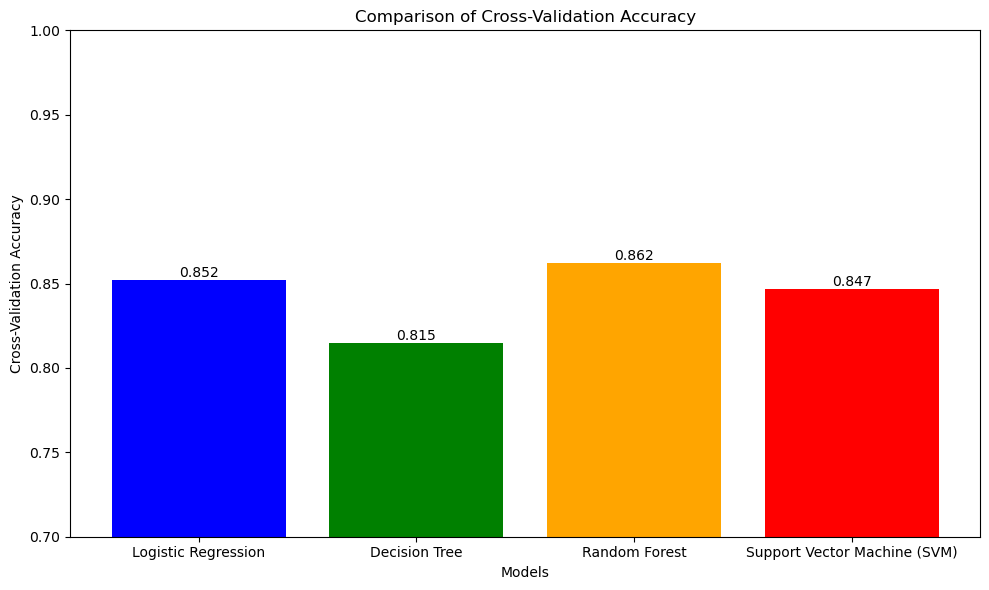

In [27]:
# Plotting comparison of cross-validation accuracies for all models

import matplotlib.pyplot as plt
import numpy as np

# List of models and their corresponding cross-validation accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine (SVM)']
cv_accuracies = [log_reg_cv_accuracy, dt_cv_accuracy, rf_cv_accuracy, svm_cv_accuracy]

# Bar plot for comparison
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(models, cv_accuracies, color=['blue', 'green', 'orange', 'red'])

# Adding labels and titles to the plot
ax.set_xlabel('Models')
ax.set_ylabel('Cross-Validation Accuracy')
ax.set_title('Comparison of Cross-Validation Accuracy')
ax.set_ylim([0.7, 1.0])  
# Adding data labels on top of the bars
for bar in bars:
    yval = round(bar.get_height(), 3)
    ax.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()
